In [1]:
import torch
import fit.sine_pde as T
import numpy as np

from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

%matplotlib inline
torch.set_printoptions(precision=4, linewidth=500, sci_mode=True)

Using double precision solver
mi list ((0, 0), (1, 0), (0, 1), (2, 0), (0, 2), (1, 1))
deriv built  torch.Size([15744, 6145])


/home/apervez/work/mnn-pde/solver/lp_pde.py:722: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.derivative_row_sorted = torch.tensor(row_sorted)
/home/apervez/work/mnn-pde/solver/lp_pde.py:723: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.derivative_column_sorted = torch.tensor(column_sorted)
/home/apervez/work/mnn-pde/solver/lp_pde.py:734: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.eq_row_sorted = torch.tensor(row_sorted)
/home/apervez/work/mnn-pde/solver/lp_pde.py:735: UserWarning: To copy construct from a tensor, it i

In [2]:
T.train()

/home/apervez/miniconda3/envs/lpode/lib/python3.8/site-packages/lightning_fabric/plugins/environments/slurm.py:165: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python3.8 /home/apervez/miniconda3/envs/lpode/lib/python3.8 ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/apervez/miniconda3/envs/lpode/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages a

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1000` reached.


In [3]:
end = T.method.model.end
coord_dims = T.method.model.coord_dims
#_t = np.linspace(0, end, coord_dims[0])
target = T.dataset.y
damp = T.dataset.damp

In [4]:
T.method.model.coeffs.shape

torch.Size([1, 1, 6])

In [10]:
damp

array([[0.53526143, 0.5565612 , 0.57720502, ..., 0.57720502, 0.5565612 ,
        0.53526143],
       [0.5565612 , 0.57870855, 0.60017386, ..., 0.60017386, 0.57870855,
        0.5565612 ],
       [0.57720502, 0.60017386, 0.62243535, ..., 0.62243535, 0.60017386,
        0.57720502],
       ...,
       [0.57720502, 0.60017386, 0.62243535, ..., 0.62243535, 0.60017386,
        0.57720502],
       [0.5565612 , 0.57870855, 0.60017386, ..., 0.60017386, 0.57870855,
        0.5565612 ],
       [0.53526143, 0.5565612 , 0.57720502, ..., 0.57720502, 0.5565612 ,
        0.53526143]])

In [4]:
target.shape

torch.Size([32, 32])

In [5]:
func_list = T.method.func_list
y_list = T.method.y_list
#n_iter =500

In [6]:
(func_list[0].shape)

(1, 1, 1024)

In [7]:
t = np.linspace(0, end, coord_dims[0])
x = np.linspace(0, 10, coord_dims[1])

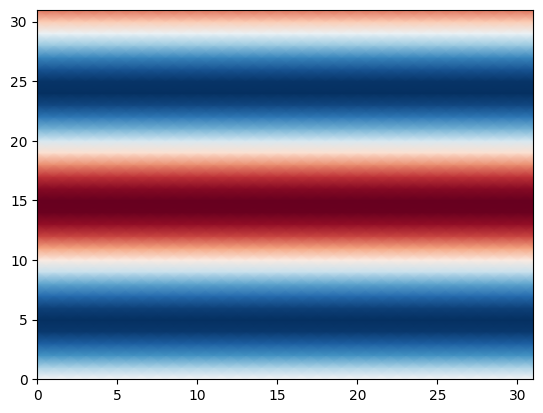

In [8]:
#plot = plt.pcolormesh(t, x, target, cmap='RdBu', shading='flat')
#plot = plt.pcolormesh(t, x, target, cmap='RdBu')
plot = plt.pcolormesh(target, cmap='RdBu', shading='gouraud')
#plot = plt.pcolormesh(damp, cmap='RdBu', shading='gouraud')
#plot = plt.pcolormesh(func_list[-1].reshape((32,32)), cmap='RdBu', shading='gouraud')

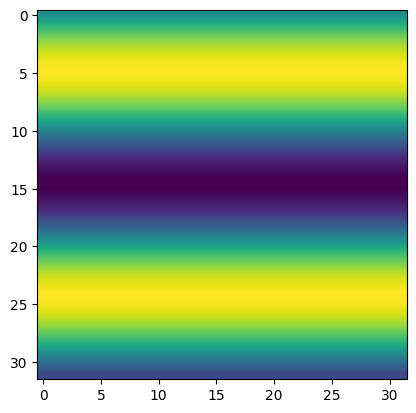

In [9]:
im = plt.imshow(target, interpolation='bilinear')

In [10]:
plt.show()

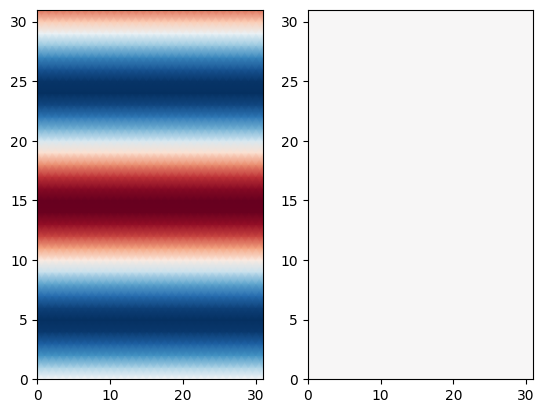

In [11]:
fig, ax = plt.subplots(1,2)
cax0 = ax[0].pcolormesh(y_list[-1].reshape(*coord_dims), cmap='RdBu', shading='gouraud')
cax1 = ax[1].pcolormesh(func_list[-1].reshape(*coord_dims), cmap='RdBu', shading='gouraud')

def animate(i):
   cax0.set_array(y_list[i].reshape(*coord_dims).flatten())
   cax1.set_array(func_list[i].reshape(*coord_dims).flatten())

anim = FuncAnimation(fig, animate, interval=100, frames=190)
HTML(anim.to_html5_video())

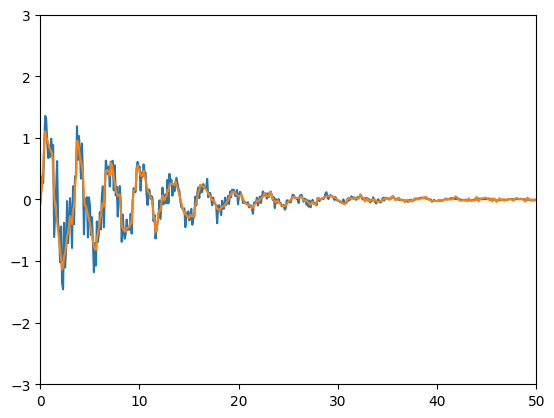

In [5]:

fig, ax = plt.subplots(1,1)
ax.set_xlim((0,end))
ax.set_ylim((-3,3))

line1, = ax.plot([], [])
line2, = ax.plot([], [])


def animate(t):
    line1.set_data(_y,y_list[2*t])
    line2.set_data(_y,func_list[2*t])
    return line1,
anim = FuncAnimation(fig, animate, frames=250, interval=20, blit=True)

HTML(anim.to_html5_video())